# Deep Learning

This notebook shows how to build a deep learning model to predict the quality score of different wines

In [1]:
# Initial imports
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

%matplotlib inline

In [2]:
# Read in data
data = Path("../Resources/winequality.csv")
df = pd.read_csv(data, delimiter=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Create the features (X) and target (y) sets
X = df.iloc[:, 0:11].values
y = df["quality"].values

In [4]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [5]:
# Define the model - shallow neural net
number_hidden_nodes = 8


nn = Sequential()
# Hidden layer
nn.add(number_input_features = 11 #X.shape[1]
    Dense(units=number_hidden_nodes, input_dim=number_input_features, activation="relu")
)
# Output layer
nn.add(Dense(units=1, activation="linear"))

In [6]:
# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Train the model
model_1 = nn.fit(X, y, validation_split=0.3, epochs=200)

Epoch 1/200
35/35 [==============================] - 1s 5ms/step - loss: 38.9677 - mse: 38.9677 - val_loss: 36.9022 - val_mse: 36.9022
Epoch 2/200
35/35 [==============================] - 0s 2ms/step - loss: 35.8512 - mse: 35.8512 - val_loss: 34.2402 - val_mse: 34.2402
Epoch 3/200
35/35 [==============================] - 0s 2ms/step - loss: 33.3527 - mse: 33.3527 - val_loss: 31.9443 - val_mse: 31.9443
Epoch 4/200
35/35 [==============================] - 0s 2ms/step - loss: 31.2387 - mse: 31.2387 - val_loss: 29.9577 - val_mse: 29.9577
Epoch 5/200
35/35 [==============================] - 0s 2ms/step - loss: 29.4259 - mse: 29.4259 - val_loss: 28.1436 - val_mse: 28.1436
Epoch 6/200
35/35 [==============================] - 0s 2ms/step - loss: 27.7883 - mse: 27.7883 - val_loss: 26.4976 - val_mse: 26.4976
Epoch 7/200
35/35 [==============================] - 0s 2ms/step - loss: 26.2696 - mse: 26.2696 - val_loss: 24.9324 - val_mse: 24.9324
Epoch 8/200
35/35 [==============================] - 0s

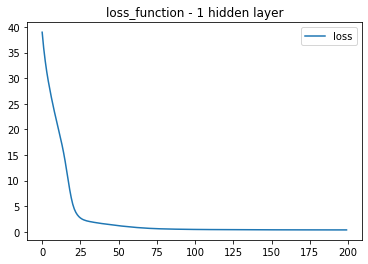

In [7]:
# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 1 hidden layer")
plt.legend(["loss"])
plt.show()

In [8]:
# Define the model - deep neural net
number_input_features = 11
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 4

nn = Sequential()
# First hidden layer
nn.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
# Output layer
nn.add(Dense(units=1, activation="linear"))

In [9]:
# Compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Fit the model
model_2 = nn.fit(X, y, validation_split=0.3, epochs=200)

Epoch 1/200
35/35 [==============================] - 1s 5ms/step - loss: 23.9766 - mse: 23.9766 - val_loss: 23.5652 - val_mse: 23.5652
Epoch 2/200
35/35 [==============================] - 0s 2ms/step - loss: 20.5278 - mse: 20.5278 - val_loss: 20.5245 - val_mse: 20.5245
Epoch 3/200
35/35 [==============================] - 0s 2ms/step - loss: 16.7897 - mse: 16.7897 - val_loss: 17.2396 - val_mse: 17.2396
Epoch 4/200
35/35 [==============================] - 0s 2ms/step - loss: 13.0328 - mse: 13.0328 - val_loss: 13.8615 - val_mse: 13.8615
Epoch 5/200
35/35 [==============================] - 0s 2ms/step - loss: 9.6874 - mse: 9.6874 - val_loss: 10.6361 - val_mse: 10.6361
Epoch 6/200
35/35 [==============================] - 0s 2ms/step - loss: 6.9955 - mse: 6.9955 - val_loss: 7.7849 - val_mse: 7.7849
Epoch 7/200
35/35 [==============================] - 0s 2ms/step - loss: 5.0511 - mse: 5.0511 - val_loss: 5.6452 - val_mse: 5.6452
Epoch 8/200
35/35 [==============================] - 0s 2ms/step 

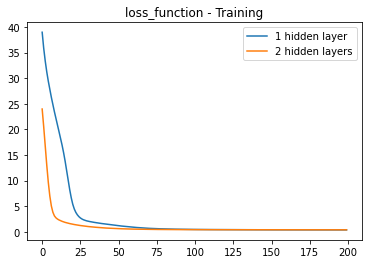

In [10]:
plt.plot(model_1.history["loss"])
plt.plot(model_2.history["loss"])
plt.title("loss_function - Training")
plt.legend(["1 hidden layer", "2 hidden layers"])
plt.show()

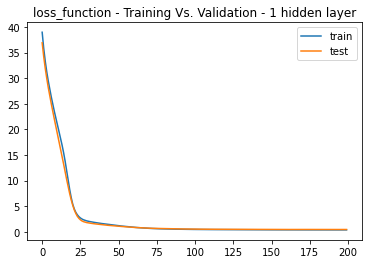

In [11]:
# Train vs test for shallow net
plt.plot(model_1.history["loss"])
plt.plot(model_1.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 1 hidden layer")
plt.legend(["train", "test"])
plt.show()

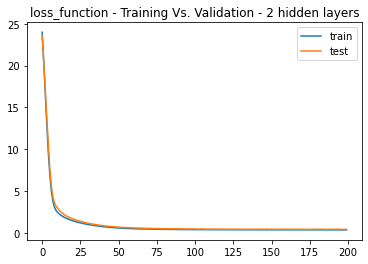

In [12]:
# Train vs test for deep net
plt.plot(model_2.history["loss"])
plt.plot(model_2.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 2 hidden layers")
plt.legend(["train", "test"])
plt.show()